# Example 3: Marcus-Levich-Jortner electron transfer rates
In this example, we will use Marcus and Marcus-Levich-Jortner (MLJ) theories to calculate the electron transfer rates. In particular, we will reproduce the results of Closs et al. [J. Phys. Chem. 1986, 90, 16, 3673–3683] (Figures 1 and 2). To calculate the transfer rates we will use the 'DonorAcceptor' module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vibron import DonorAcceptor
from vibron.utils import units

In [2]:
# Parameters from Closs et al.
lambda_MTHF = 0.75                       # outer-sphere reorganization in MTHF in eV
lambda_isooct = 0.15                     # outer-sphere reorganization in isooctane in eV
V = 6.2 * units.wavenumber2eV            # donor-acceptor coupling in eV
vib_modes = [1500 * units.wavenumber2eV] # molecular vibrational mode in eV
HR_parameters = [0.45/vib_modes[0]]      # Huang-Rhys parameter
temp_K = 296                             # temperature in K

deltaG = np.linspace(-2.5,0.1)           # deltaG range in eV

We will calculate the rates in isooctane and MTHF using both the Marcus and the (single-mode) Marcus-Levich-Jortner theory

In [3]:
Marcus_MTHF = []; MLJ_MTHF = []
Marcus_isooct = []; MLJ_isooct = []

MTHF = DonorAcceptor(lambda_o=lambda_MTHF, V=V, vib_modes_A=vib_modes,hr_parameters_A=HR_parameters,temp_K = temp_K)
Isooct = DonorAcceptor(lambda_o=lambda_isooct, V=V, vib_modes_A=vib_modes,hr_parameters_A=HR_parameters,temp_K = temp_K)
        

for energy in deltaG:
    
    MTHF.deltaE = energy
    Marcus_MTHF.append(MTHF.marcus())
    MLJ_MTHF.append(MTHF.mlj())
    
    Isooct.deltaE = energy
    Marcus_isooct.append(Isooct.marcus())
    MLJ_isooct.append(Isooct.mlj())

Let's first compare the MLJ electron transfer rates in the two solvents:

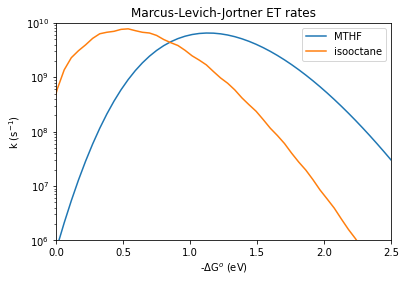

In [4]:
plt.semilogy(-deltaG, MLJ_MTHF, label='MTHF')
plt.semilogy(-deltaG, MLJ_isooct, label='isooctane')

plt.title('Marcus-Levich-Jortner ET rates')
plt.xlabel('-$\Delta$G$^o$ (eV)')
plt.ylabel('k (s$^{-1}$)')
plt.ylim(1e6,1e10)
plt.xlim(0,2.5)
plt.legend()

Secondly, we can compare the result of Marcus and MLJ calculations in the case of isooctane solvent

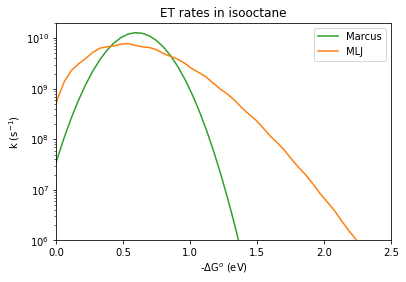

In [5]:
plt.semilogy(-deltaG, Marcus_isooct, label='Marcus',color='tab:green')
plt.semilogy(-deltaG, MLJ_isooct, label='MLJ',color='tab:orange')

plt.title('ET rates in isooctane')
plt.xlabel('-$\Delta$G$^o$ (eV)')
plt.ylabel('k (s$^{-1}$)')
plt.ylim(1e6,2e10)
plt.xlim(0,2.5)
plt.legend()

As expected, MLJ theory predicts a substantially faster ET in the inverted region. 

The 'mlj()' function can handle only a single molecular vibrational mode. In the presence of multiple molecular vibrational modes, one can instead use the 'mjl_multi()' function which performs the necessary Fourier transform numerically and additionally does not assume that the molecular vibrational modes are found in their vibrational ground state.

In [6]:
Multi_isooct = []


for energy in deltaG:
    
    Iso = DonorAcceptor(deltaE=energy, lambda_o=lambda_isooct, V=V,
                        vib_modes_A=vib_modes,hr_parameters_A=HR_parameters,temp_K = temp_K)
    
    Multi_isooct.append(Iso.mlj_multi())

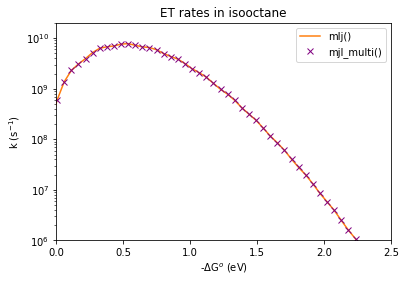

In [7]:
plt.semilogy(-deltaG, MLJ_isooct, label='mlj()',color='tab:orange')
plt.semilogy(-deltaG, Multi_isooct,'x', label='mjl_multi()',color='purple')

plt.title('ET rates in isooctane')
plt.xlabel('-$\Delta$G$^o$ (eV)')
plt.ylabel('k (s$^{-1}$)')
plt.ylim(1e6,2e10)
plt.xlim(0,2.5)
plt.legend()

The two functions produce virutally identical results.
As we can see, for a 1500 cm$^{-1}$ mode at 296 K, the assumption that this mode is in its ground state works well. 